# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [64]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [65]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [66]:
#  1. Get the total rides for each city type
type_sum_rides=pyber_data_df.groupby(["type"]).count()["ride_id"]

In [67]:
# 2. Get the total drivers for each city type
type_sum_drivers=city_data_df.groupby(["type"]).sum()["driver_count"]

In [68]:
#  3. Get the total amount of fares for each city type
type_sum_fares=pyber_data_df.groupby(["type"]).sum()["fare"]

In [69]:
#  4. Get the average fare per ride for each city type. 
fare_avg_per_ride= type_sum_fares / type_sum_rides

In [70]:
# 5. Get the average fare per driver for each city type. 
fare_avg_per_driver= type_sum_fares / type_sum_drivers

In [71]:
#  6. Create a PyBer summary DataFrame. 
summary_pyber_df=pd.DataFrame({'type':['Rural','Suburban','Urban'],
                              'Total Rides':[type_sum_rides["Rural"],type_sum_rides["Suburban"],type_sum_rides["Urban"]],
                              'Total Drivers':[type_sum_drivers["Rural"],type_sum_drivers["Suburban"],type_sum_drivers["Urban"]],
                              'Total Fares':[type_sum_fares["Rural"],type_sum_fares["Suburban"],type_sum_fares["Urban"]],
                              'Average Fare per Ride':[fare_avg_per_ride["Rural"],fare_avg_per_ride["Suburban"],fare_avg_per_ride["Urban"]],
                              'Average Fare per Driver':[fare_avg_per_driver["Rural"],fare_avg_per_driver["Suburban"],fare_avg_per_driver["Urban"]]})
summary_pyber_df=summary_pyber_df.set_index('type')
summary_pyber_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [72]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_pyber_df.index.name = None

In [73]:
#  8. Format the columns.
summary_pyber_df['Total Fares']=summary_pyber_df['Total Fares'].map("${:,.2f}".format)
summary_pyber_df['Average Fare per Ride']=summary_pyber_df['Average Fare per Ride'].map("${:,.2f}".format)
summary_pyber_df['Average Fare per Driver']=summary_pyber_df['Average Fare per Driver'].map("${:,.2f}".format)
summary_pyber_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [74]:
# 1. Read the merged DataFrame
pyber_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [75]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_date_df=pyber_data_df.groupby(["type","date"]).sum()['fare']
pyber_date_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [76]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_date_df=pyber_date_df.reset_index()

In [77]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_date_df=pyber_date_df.pivot(index='date',columns='type',values='fare')
pyber_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [78]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_choice_dates_df=pyber_date_df.loc["2019-01-01":"2019-04-28",:]
pyber_choice_dates_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [79]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_choice_dates_df.index = pd.to_datetime(pyber_choice_dates_df.index)

In [80]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_choice_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [81]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_sum_week_df=pyber_choice_dates_df.resample('W').sum()

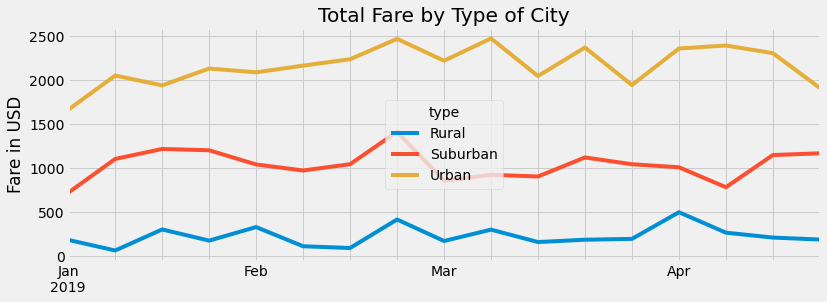

In [82]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

import numpy as np
ax = fares_sum_week_df.plot(xticks=fares_sum_week_df.index,figsize=(12,4))

ylab=ax.set_ylabel('Fare in USD')
ax.set_xlabel(None)
ax.set_title("Total Fare by Type of City")
plt.legend(loc="center",title="type")

plt.savefig("analysis/Pyber_Fare_Summary.png")
            
plt.show()

